In [1]:
%matplotlib ipympl

import numpy as np

import sys
sys.path.append('..')
from lib.maze import Maze
from lib.cell import Cell

### input/output configuration

In [2]:
input_file = '../data/input.txt'
output_file = '../data/output.txt'

### Read maze from file

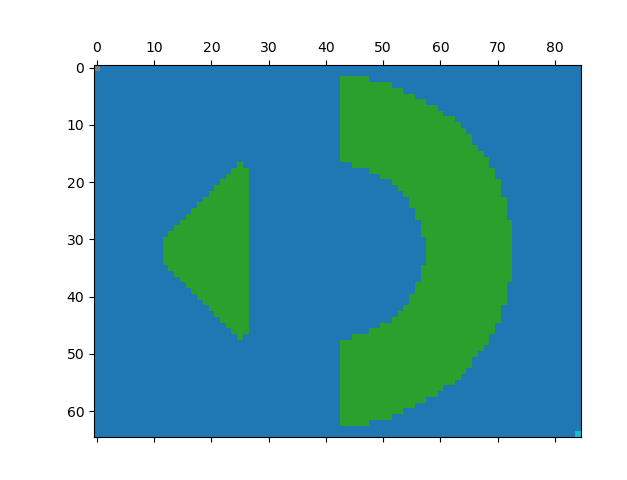

In [3]:
maze = Maze.from_file(input_file)
maze.draw()

### Solve maze

In [4]:
path = maze.solve(max_steps = 1000, verbose = True)

step: 0, paths: 2, shortest distance to finish: 104.80935072788114
step: 1, paths: 4, shortest distance to finish: 104.01922899156675
step: 2, paths: 6, shortest distance to finish: 103.23274674249446
step: 3, paths: 9, shortest distance to finish: 102.44998779892558
step: 4, paths: 12, shortest distance to finish: 101.67103815738285
step: 5, paths: 16, shortest distance to finish: 100.89598604503551
step: 6, paths: 20, shortest distance to finish: 100.12492197250393
step: 7, paths: 25, shortest distance to finish: 99.35793878699377
step: 8, paths: 30, shortest distance to finish: 98.59513172565875
step: 9, paths: 36, shortest distance to finish: 97.83659846908007
step: 10, paths: 42, shortest distance to finish: 97.082439194738
step: 11, paths: 49, shortest distance to finish: 96.33275663033837
step: 12, paths: 56, shortest distance to finish: 95.58765610684259
step: 13, paths: 64, shortest distance to finish: 94.847245611035
step: 14, paths: 72, shortest distance to finish: 94.111635

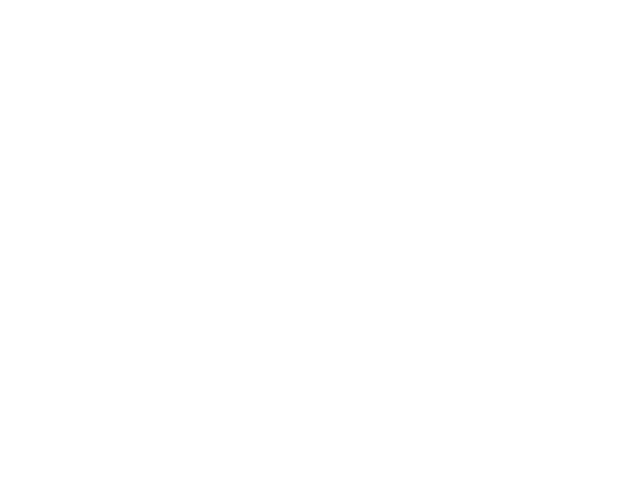

In [5]:
if path:
  ani = maze.draw_animation(path = path, ms = 3)

### Convert solution into a sequence of directions

In [6]:
def get_direction(stp):
  if stp[0] == 1 and stp[1] == 0:
    return 'D'
  elif stp[0] == -1 and stp[1] == 0:
    return 'U'
  elif stp[0] == 0 and stp[1] == 1:
    return 'R'
  elif stp[0] == 0 and stp[1] == -1:
    return 'L'
  else:
    raise RuntimeError(f'bad step {stp}')

steps = np.array(path)[1:] - np.array(path)[:-1]
directions = [get_direction(s) for s in steps]
print(*directions)

D D D D D D D D D D D D D D D D D D D D U U U U R R L L U D D U D U U R L U D D D D U R D U R R D R U R R D D L U L R R D D L L L L D D D D R L U D U D R U D D R R U D R R R L L D D D D D D D R D D U L R U R R R R R R R D D D R R D D U R R R D R R R U U D R R D D D D R R U U R D R R R R R U D R D R D D R R U R U D R R D R D D R U R D D D D D D R R D U D D D D R U R D R D R D D D R D D R D D R D R R R R R R L D D R L R R R R L R R R R L R U D U U R R R L U R R R U U R U R R R U R R R U D R R D R L D R R R D D R R R U L L R D D D D U D R R


### Write solution to the output file

In [7]:
file = open(output_file, 'w')
file.write(' '.join(directions) + '\n')
file.close()